> **提示**：欢迎参加“调查数据集”项目！引用段会添加这种提示，帮助你制定调查方法。提交项目之前，最后浏览一下报告，将这一段删除，以保持报告简洁。首先，需要双击这个 Markdown 框，将标题更改为与数据集和调查相关的标题。

# 项目：调查TMDb电影数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在这一段报告中对你选择进行分析的数据集进行简要介绍。在本段末尾，对你计划在报告过程中探索的问题进行描述。自己尝试建立至少一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，务必熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

- 研究问题 1哪一年的电影发行最多
- 研究问题 2 票房排名前几的电影评分如何，电影名字是什么

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [22]:
# 用这个框对你计划使用的所有数据包设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理

> **提示**：在这一段报告中载入数据，检查简洁度，然后整理和清理数据集，以进行分析。务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [23]:
# 加载数据并打印几行。进行几项操作，检查数据
#   类型，以及是否有缺失数据或错误数据。
df=pd.read_csv(r"tmdb-movies.csv")
print(df.info())
print(df.describe())
df.head()
#把缺失值判断放入1.3.2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **提示**：_不应_在每个框中进行太多操作。可以自由创建框，进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索操作。不要求对其进行组织，但务必仔细阅读备注，理解每个代码框的用途。完成分析之后，可以创建 notebook 副本，在其中去除多余数据，组织步骤，从而形成结构连贯、紧密的报告。

> **提示**：务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。尽量做到这一点，以便读者理解后续框中的内容。

### TMDb电影数据清理

#### 数据清理_修改列名与删除不需要研究的列

In [24]:
# 讨论数据结构和需要解决的任何问题之后，
#   在本段的第二部分进行这些清理步骤。
print(df.columns)
#不加括号
#把'original_title'改为movie_title
df.rename(columns={'original_title':"movie_title"},inplace=True)

#删除不需要研究的列
df=df.loc[:,["revenue","movie_title","vote_average","release_year"]]
df.head(1)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


,revenue,movie_title,vote_average,release_year
0,1513528810,Jurassic World,6.5,2015


#### 数据清理_缺失值的判断与处理
- 先确定研究问题的变量：revenue，movie_title，vote_average，release_year
- 接着查看这些变量是否存在缺失值
- 若存在，删除缺失值

- 结果无缺失值。

In [25]:
#查看缺失值
print(df.count().sort_values(ascending=False))

#研究的企业是imdb,目前imdb_id存在空值，删除空值
#df=df.dropna(subset=["imdb_id"])
#df.shape

release_year    10866
vote_average    10866
movie_title     10866
revenue         10866
dtype: int64


#### 数据清理_重复值的判断与处理
- 先找出重复值
- 若存在重复值，删除。
- 结果存在一行重复值，并删除。

In [26]:
print("rows:",df.shape[0])
#
df[df.duplicated()]

rows: 10866


,revenue,movie_title,vote_average,release_year
2090,967000,TEKKEN,5.0,2010


In [27]:
df=df.drop_duplicates()
print("rows:",df.shape[0])

rows: 10865


<a id='eda'></a>
## 探索性数据分析

> **提示**：整理和清理数据之后，现在可以进行探索。计算统计值，创建视图，解决你在简介段提出的研究问题。建议采用系统化方法。一次探索一个变量，然后探索变量之间的关系。

### 研究问题 1哪一年的电影发行最多
- 由可视化可知，2014年的电影发行量最多，是699部


2014    700
2013    659
2015    629
2012    588
2011    540
Name: release_year, dtype: int64

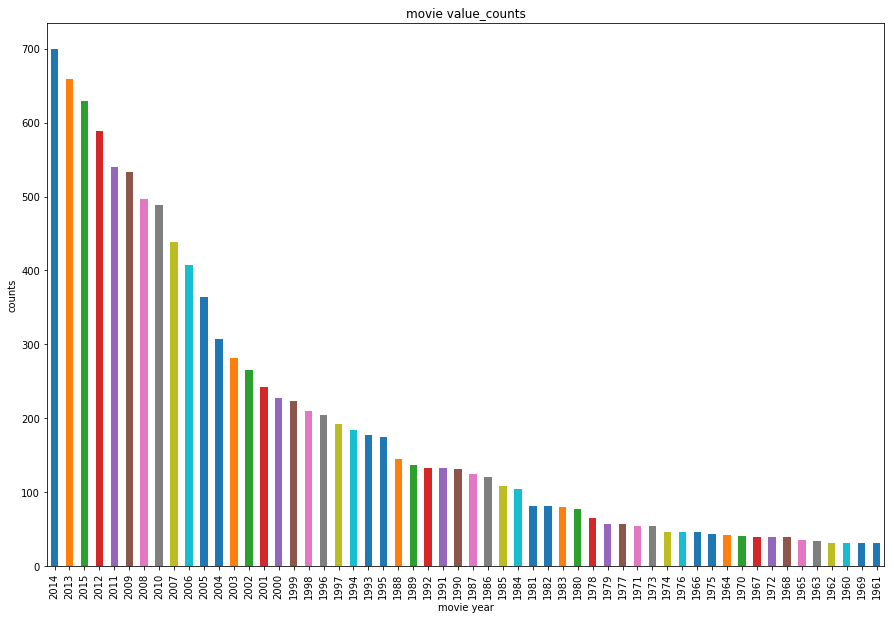

In [28]:
plt.figure(figsize=(15,10))
plt.title("movie value_counts")
plt.xlabel("movie year")
plt.ylabel("counts")
df.release_year.value_counts().plot(kind="bar")

a=df.release_year.value_counts()
a.head()

### 研究问题 2 票房排名前几的电影评分如何，电影名字是什么
- 由可视化图1可知，票房排名前几的电影评分几乎都聚焦在6.5分到7.5分之间
- 由皮尔森相关系数知，票房与评分存在正相关性，但是相关性并不强，因为p=0.17314673004022876
- 由可视化图2得，票房前11名的电影的名字。

0.17254138492900234

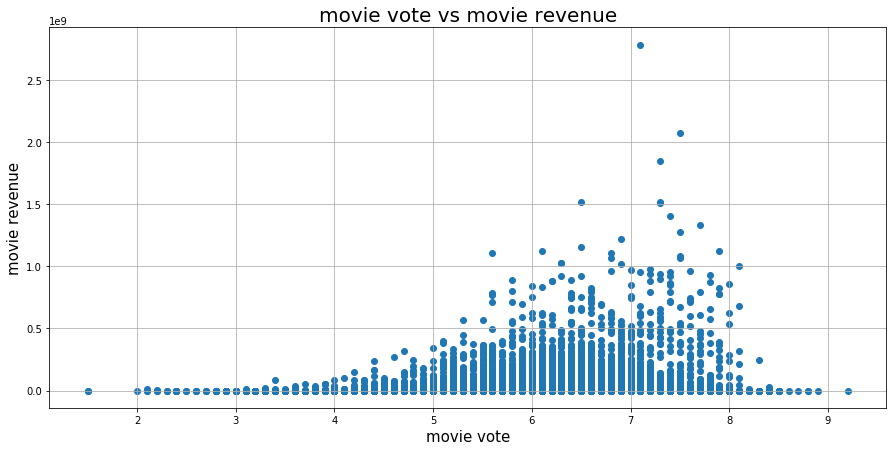

In [29]:
plt.figure(figsize=(15,7))
plt.title("movie vote vs movie revenue",fontsize = 20)
plt.xlabel("movie vote",fontsize = 15)
plt.ylabel("movie revenue",fontsize = 15)
plt.grid(True)

plt.scatter(df['vote_average'],df['revenue'])

#相关性
df['vote_average'].corr(df['revenue'])

(131, 3)
                                       movie_title     revenue  vote_average
1386                                        Avatar  2781505847           7.1
3                     Star Wars: The Force Awakens  2068178225           7.5
5231                                       Titanic  1845034188           7.3
4361                                  The Avengers  1519557910           7.3
0                                   Jurassic World  1513528810           6.5
4                                        Furious 7  1506249360           7.3
14                         Avengers: Age of Ultron  1405035767           7.4
3374  Harry Potter and the Deathly Hallows: Part 2  1327817822           7.7
5422                                        Frozen  1274219009           7.5
5425                                    Iron Man 3  1215439994           6.9
8                                          Minions  1156730962           6.5


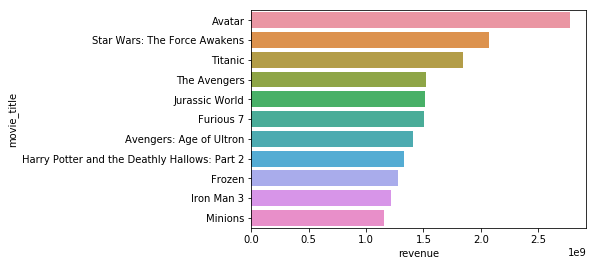

In [30]:
df=df.sort_values(by="revenue" , ascending=False)
df11=df.loc[:5,["movie_title","revenue","vote_average"]]
print(df11.shape)
df11_0=df11.head(11)
print(df11_0)

"""plt.figure(figsize=(20,10))
plt.title("movie value_counts",fontsize = 20)
plt.xlabel("movie year",fontsize = 15)
plt.ylabel("counts",fontsize = 15)"""

import seaborn as sns
sns.barplot(df11_0["revenue"], df11_0["movie_title"])

#plt.bar(df11_0["movie_title"],df11_0["revenue"],width=0.1)

<a id='conclusions'></a>
## 结论

> **提示**：最后，总结你的调查结果。确保了解探索结果的限制。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相互关系推导出因果关系！

> **提示**：如果对报告满意，应将其副本保存为 HTML 或 PDF 形式。导出报告之前请检查一遍，确保报告流程完整。应删除所有类似的“提示”引用段，以保持报告简洁。还需要查看课程结尾的项目提交页的项目审阅规范。

- 报告中使用的数据并不是总体数据，但是这个样本足够大，可以支撑我得到足够准确的结论。因为总体数据有10866条，我的样本数据有10856条。
- 在数据清理中，根据研究的问题，保留4个特征，只有一行重复值，无缺失值。这些变动会对数据分析结果造成非常小的影响。
- 除了报告中涉及到的变量，票房与受欢迎度是可能相关但没有考虑进来的。

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1